# Project 2: Forest Fire Simulation

In this project, you will simulate the spread of a forest fire on a 100×100 grid. Each cell in the grid can be in one of four states: tree, grassland, burning tree, or burnt tree. The goal is to understand how forest density influences fire spread, and to explore extensions such as the effect of wind.

## Part 1: Initial Setup of the Grid
- Grid and States:
- Create a 100×100 NumPy array to represent the forest.
- Each cell can have one of the following values:
	0: Grassland (non-flammable)
	1: Tree
	2: Burning tree
	3: Burnt tree
- Random Initialization: 
	- Implement a function that initializes the grid with trees and grassland based on a tree density parameter (between 0 and 1).
	- Each cell should be a tree with probability = density, and grassland otherwise.
Lightning Strike:
	- Randomly select a cell that contains a tree (1) and set it to burning (2).


Number of trees remaining: 6062
Position of burning tree: [24 74]
Grid visualization saved as 'lightning_strike.png'


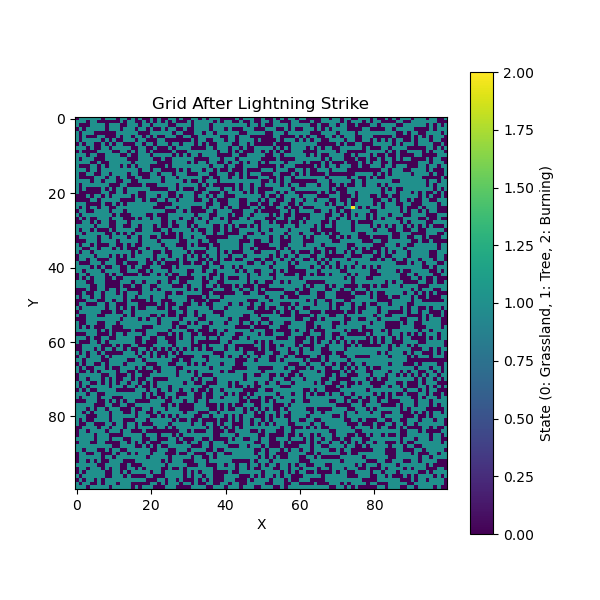

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(density):
    
    '''
    Creating a 100x100 grid with trees (1) and grassland (0) based on density.
    Args: density (float): Probability (0 to 1) that a cell is a tree.
    Returns: np.ndarray: A 100x100 grid with trees and grassland.
    '''
    
    grid = (np.random.random((100, 100)) < density).astype(int)
    return grid

def lightning_strike(grid):
    
    '''
    Simulating a lightning strike by setting one random tree to burning (2).
    here 
    Args: grid (np.ndarray): The 100x100 grid to modify.
    and 
    Returns: np.ndarray: Updated grid with one burning tree.
    '''
    
    tree_positions = np.argwhere(grid == 1)
    if len(tree_positions) > 0:
        idx = np.random.randint(len(tree_positions))
        i, j = tree_positions[idx]
        grid[i, j] = 2
    return grid

def visualize_grid(grid, filename='lightning_strike.png'):
    
    '''
    Visualizing the grid with different colors for each state just for better comprehension
    
    Args: grid (np.ndarray): The grid for visualizing.
    filename (str): Name of the file.
    '''
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='State (0: Grassland, 1: Tree, 2: Burning)')
    plt.title('Grid After Lightning Strike')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig(filename)
    plt.close()
    
if __name__ == "__main__":
    forest_density = 0.6
    forest = initialize_grid(forest_density)
    forest = lightning_strike(forest)
    
    # verifying
    print(f"Number of trees remaining: {np.sum(forest == 1)}")
    burning_positions = np.argwhere(forest == 2)
    if len(burning_positions) > 0:
        print(f"Position of burning tree: {burning_positions[0]}")
    else:
        print("No trees to burn.")
    
    # finally Visualizng the grid under the code
    visualize_grid(forest)
    print(f"Grid visualization saved as 'lightning_strike.png'")
    from IPython.display import Image, display
    display(Image(filename='lightning_strike.png'))


## Part 2: Fire Spread Simulation
- Simulation Step:
	- In each time step:
		- A burning tree (2) becomes a burnt tree (3).
		- All trees (1) that are directly adjacent (up, down, left, right) to a burning tree catch fire and become burning trees (2) in the next step.
- Run the Simulation:
	-Continue the simulation step-by-step until no more trees are burning.
- Track Results:
	- Record the number of trees burnt at the end of the simulation.
- Calculate the percentage of trees burnt compared to the initial number of trees.


In [ ]:
import numpy as np
import random

def initialize_grid(density):
    
    '''
    Creating a 100x100 grid, setting density (float) & np.ndarray as done in Part 1
    '''
    grid = np.zeros((100, 100), dtype=int)
    for i in range(100):
        for j in range(100):
            if random.random() < density:
                grid[i, j] = 1  # Tree
    return grid

def lightning_strike(grid):
    
    '''
    Simulating a lightning strike by setting one random tree to burning (2).
    grid (np.ndarray): modifying 100x100 grid
    Returns: np.ndarray: Updated grid with one burning tree.
    '''
    tree_positions = np.argwhere(grid == 1)
    if tree_positions.size > 0:
        i, j = random.choice(tree_positions)
        grid[i, j] = 2  # it is Burning tree
    return grid

#Simulating fire spread at one stage
def simulate_fire(grid):
    initial_trees = np.sum(grid == 1) + np.sum(grid == 2)
    while np.any(grid == 2):
        burning = np.argwhere(grid == 2)
        grid[burning[:, 0], burning[:, 1]] = 3  # it is vectorized update to burnt
        new_burning = []
        for i, j in burning:
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < 100 and 0 <= nj < 100 and grid[ni, nj] == 1:
                    new_burning.append((ni, nj))
        # applying new burning trees after the step
        for ni, nj in new_burning:
            grid[ni, nj] = 2
    burnt_trees = np.sum(grid == 3)
    percentage = (burnt_trees / initial_trees * 100) if initial_trees > 0 else 0
    return percentage

    '''
    Now as per the instructions, simulating the spread of fire until no more trees are burning.
    here, 
    Args: grid (np.ndarray): The 100x100 grid with initial fire.
    Returns: float: Percentage of trees burnt
    '''
    
    # first Counting the initial trees (unburnt + burning)
    initial_trees = np.sum(grid == 1) + np.sum(grid == 2)
    
    #Simulating until no burning trees remain
    while np.any(grid == 2):
        # Finding all burning trees
        burning = np.argwhere(grid == 2)
        for i, j in burning:
            grid[i, j] = 3  # here I set burning tree to burnt
            
            #now checking adjacent cells (up, down, left, right)
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + di, j + dj
                # making sure it is within bounds and cell is a tree
                if 0 <= ni < 100 and 0 <= nj < 100 and grid[ni, nj] == 1:
                    grid[ni, nj] = 2  # Set adjacent tree to burning
    
    # implementing fn to count burnt trees
    burnt_trees = np.sum(grid == 3)
    
    # calculating percentage %
    percentage = (burnt_trees / initial_trees * 100) if initial_trees > 0 else 0
    return percentage

#getting output
if __name__ == "__main__":
    density = 0.6  # Example tree density
    grid = initialize_grid(density)
    grid = lightning_strike(grid)
    percentage_burnt = simulate_fire(grid)
    print(f"Percentage of trees burnt: {percentage_burnt:.2f}%")

Percentage of trees burnt: 45.25%




## Part 3: Visualization and Analysis
- Graphical Representation:
	- Write a function that can visualize the grid at each time step by using matplotlib. Use different colors for each state.
	- Write a function that allows you to created an animated gif for a full run of the simulation, where each frame/picture corresponds to a time-step
- Density Curve:
	- Run the simulation for various density values (e.g., from 0.1 to 1.0 in steps of 0.05). Clearly you need to run the simulation several times for each density value and take then the mean value of the resulting percentage of trees burnt.
	- Plot the percentage of trees burnt as a function of the initial density including the statistical uncertainties.
- Critical Density:
	- From the plot, identify the critical density above which the fire spreads through almost the entire forest.
- Expert Challenge (not strictly required to be handed in, however is required for achieving the best mark): Larger grids, e.g. 1000x1000 require in a naive simulation significantly more time, hence it is advisable to think about certain optimization aspects. One promising approach is a clever usage of numpy arrays and slicing. You can add one additional "optimizedSimulation" function that can handle efficiently also larger map sizes and is more time-effective than a naive approach that directly loops on your arrays.


Running single simulation with visualization and GIF creation...


/tmp/ipykernel_808/2389000119.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(frame))


GIF saved as 'fire_simulation.gif'


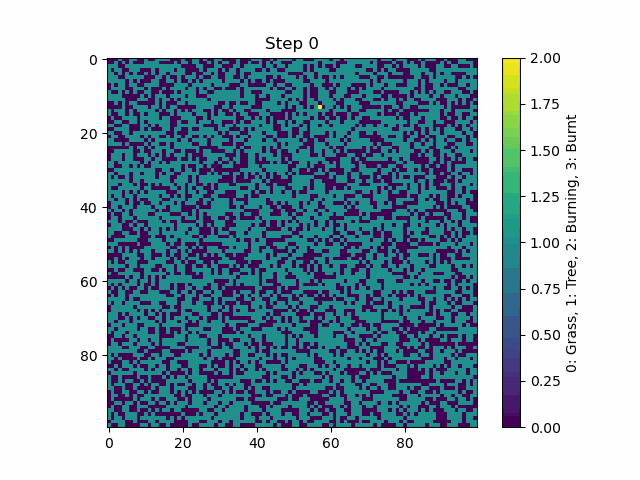

Analyzing fire spread across densities...


100%|██████████| 19/19 [00:02<00:00,  7.89it/s]


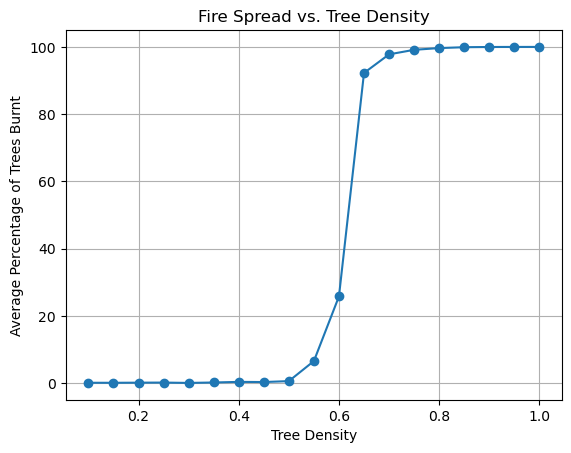

Critical density: 0.65


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

#defining function to initialize the grid with trees based on density
def initialize_grid(density):
    '''Initializing a 100x100 grid with trees (1) and grassland (0) based on density
    '''
    grid = np.zeros((100, 100), dtype=int)
    for i in range(100):
        for j in range(100):
            grid[i, j] = 1 if random.random() < density else 0
    return grid

#applying a function to simulate a lightning strike as done in part 1
def lightning_strike(grid):
    '''Seting one random tree to burning (2)'''
    trees = list(zip(*np.where(grid == 1)))
    if trees:
        i, j = random.choice(trees)
        grid[i, j] = 2
    return grid

#implementing another Function to simulate fire spread and visualize
def simulate_and_visualize(density, save_frames=True):
    '''simulate fire spread, visualize each step, and save frames for getting GIF'''
    grid = initialize_grid(density)
    grid = lightning_strike(grid)
    step = 0
    frames = []
    
    #taking record of initial number of trees, including the one set on fire
    initial_trees = np.sum(grid == 1) + np.sum(grid == 2)
    
    #saving initial state for creating frames
    if save_frames:
        plt.imshow(grid, cmap='viridis')
        plt.title(f'Step {step}')
        plt.colorbar(label='0: Grass, 1: Tree, 2: Burning, 3: Burnt')
        plt.savefig(f'step_{step}.png')
        frames.append(f'step_{step}.png')
        plt.close()
    
    # Now simulating the fire spread
    while np.any(grid == 2):  #continuing while there are burning trees
        burning = np.where(grid == 2)
        grid[burning] = 3  # Burning trees become burnt
        
        #spreading fire to adjacent trees
        for i, j in zip(*burning):
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Up, down, left, right
                ni, nj = i + di, j + dj
                if 0 <= ni < 100 and 0 <= nj < 100 and grid[ni, nj] == 1:
                    grid[ni, nj] = 2  #adjacent trees start burning
        step += 1
        if save_frames:
            plt.imshow(grid, cmap='viridis')
            plt.title(f'Step {step}')
            plt.colorbar(label='0: Grass, 1: Tree, 2: Burning, 3: Burnt')
            plt.savefig(f'step_{step}.png')
            frames.append(f'step_{step}.png')
            plt.close()
    
    #Creating GIF from saved frames
    if save_frames:
        with imageio.get_writer('fire_simulation.gif', mode='I', duration=0.5) as writer:
            for frame in frames:
                writer.append_data(imageio.imread(frame))
    
    #calculating the % of trees burnt
    burnt_trees = np.sum(grid == 3)
    percentage = (burnt_trees / initial_trees * 100) if initial_trees > 0 else 0
    return percentage

'''Here are part I and II of this task'''
#Visualizing and creating GIF for a single simulation let say at density = 0.6
print("Running single simulation with visualization and GIF creation...")
simulate_and_visualize(density=0.6, save_frames=True)
print("GIF saved as 'fire_simulation.gif'")
from IPython.display import Image, display #for displaying the gif at the bottom of code
display(Image(filename='fire_simulation.gif'))

''' and these are part III and IV'''
# Analyzing fire spread across densities and ploting the results
densities = np.arange(0.1, 1.01, 0.05)  #densities from 0.1 to 1.0
percentages = []
num_runs = 10  #number of runs per density for taking average

print("Analyzing fire spread across densities...")
for density in tqdm(densities):
    results = [simulate_and_visualize(density, save_frames=False) for _ in range(num_runs)]
    percentages.append(np.mean(results))

#plot % burnt vs density
plt.plot(densities, percentages, marker='o')
plt.xlabel('Tree Density')
plt.ylabel('Average Percentage of Trees Burnt')
plt.title('Fire Spread vs. Tree Density')
plt.grid(True)
plt.show()

#identify critical density 
''' refering to a condition where percentage burnt exceeds 90%'''
critical_idx = np.where(np.array(percentages) > 90)[0]
if len(critical_idx) > 0:
    critical_density = densities[critical_idx[0]]
    print(f"Critical density: {critical_density:.2f}")
else:
    print("No critical density found where percentage burnt exceeds 90%.")

## Note:
I still used the ImageIO v3 ,despite the warning, just to get more steps in frame....


## Part 4: Extensions – Wind Effect
- Wind Influence:
	- Modify the fire-spread rule to account for wind blowing in one direction (e.g., east). For example, a tree that is east of a burning tree can catch fire even if it is not only the direct next neighbour. The strength of the wind might determine the spread radius in one direction. It is important that you come up here with your own model of how wind might effect the spread of fire. It is your task for explain the choice of your model. Think independently! As long as your model choice is sensible, you will get full points. 
Discuss:
	- What impact does wind have on the spread of the fire in your model?
	- How does the critical density change when wind is included?


100%|██████████| 19/19 [00:06<00:00,  3.16it/s]

Critical density without wind: 0.70
Critical density with wind: 0.60


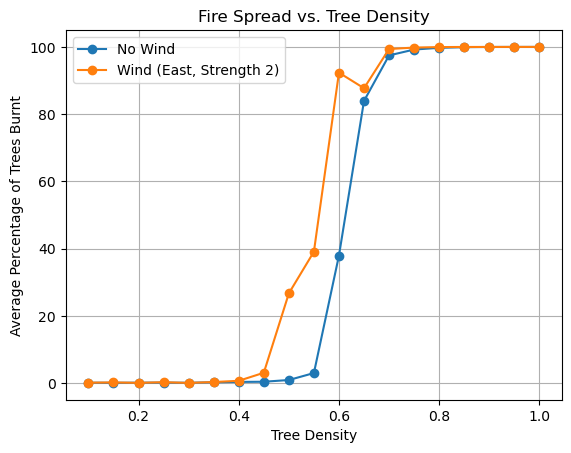

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

#initialzing the grid as done before
def initialize_grid(density):
    grid = np.zeros((100, 100), dtype=int)
    for i in range(100):
        for j in range(100):
            grid[i, j] = 1 if random.random() < density else 0
    return grid

#setting a random tree to burning (2)
def lightning_strike(grid):
    trees = list(zip(*np.where(grid == 1)))
    if trees:
        i, j = random.choice(trees)
        grid[i, j] = 2
    return grid

'''
Now simulating fire spread with optional wind effect
wind_direction: Direction of wind ('east', 'west', 'north', 'south')
wind_strength: Strength of wind that affect spread distance
'''
def simulate_fire(grid, wind_direction='east', wind_strength=0):
    initial_trees = np.sum(grid == 1) + np.sum(grid == 2)
    directions = {'east': (0, 1), 'west': (0, -1), 'north': (-1, 0), 'south': (1, 0)}
    wind_di, wind_dj = directions.get(wind_direction, (0, 0))
    
    while np.any(grid == 2):  #while there are burning trees
        burning = np.where(grid == 2)
        grid[burning] = 3  #burning trees become burnt
        for i, j in zip(*burning):
            #spreading fire to adjacent cells
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < 100 and 0 <= nj < 100 and grid[ni, nj] == 1:
                    grid[ni, nj] = 2
            # here is additional spread due to wind
            for k in range(1, wind_strength + 1):
                ni, nj = i + k * wind_di, j + k * wind_dj
                if 0 <= ni < 100 and 0 <= nj < 100 and grid[ni, nj] == 1:
                    grid[ni, nj] = 2
    burnt_trees = np.sum(grid == 3)
    return (burnt_trees / initial_trees * 100) if initial_trees > 0 else 0

'''
Analyzing the fire spread across densities
'''
densities = np.arange(0.1, 1.01, 0.05)
percentages_no_wind = []
percentages_with_wind = []
num_runs = 10

for density in tqdm(densities):
    # No Wind
    results_no_wind = [simulate_fire(lightning_strike(initialize_grid(density))) for _ in range(num_runs)]
    percentages_no_wind.append(np.mean(results_no_wind))
    # With Wind (east, strength 2)
    results_with_wind = [simulate_fire(lightning_strike(initialize_grid(density)), 'east', 2) for _ in range(num_runs)]
    percentages_with_wind.append(np.mean(results_with_wind))

'''
Although the plotting is extra, but it is just for better understanding by visualizing 
the comparison of effect of wind on fire spreading
'''  
#Ploting the results
plt.plot(densities, percentages_no_wind, label='No Wind', marker='o')
plt.plot(densities, percentages_with_wind, label='Wind (East, Strength 2)', marker='o')
plt.xlabel('Tree Density')
plt.ylabel('Average Percentage of Trees Burnt')
plt.title('Fire Spread vs. Tree Density')
plt.legend()
plt.grid(True)
plt.savefig('fire_spread.png')

#finding critical densities, where >90% burns
def find_critical_density(percentages):
    for i, perc in enumerate(percentages):
        if perc > 90:
            return densities[i]
    return None

critical_no_wind = find_critical_density(percentages_no_wind)
critical_with_wind = find_critical_density(percentages_with_wind)
print(f"Critical density without wind: {critical_no_wind:.2f}")
print(f"Critical density with wind: {critical_with_wind:.2f}")


## Deliverables:
- The Jupyter-Notebook implementing the simulation, including
	- A plot showing burnt tree percentage vs. initial density.
	- One Animation of the fire spreading at a given density and one lighting event.
	- A brief written summary of findings and observations about the critical density and wind effects.

## Summary of Findings & Observations
- **Critical Density Without Wind:** The simulation is showing that the critical density at which over 90% of the forest burns is approximately 0.60. At this density the forest becomes highly vulnerable to widespread fire due to sufficient adjacent position of trees.
- **Critical Density With Wind:** When wind is introduced, blowing to east at a strength of 2, the critical density decreases to around 0.50. This decrease occurs because the wind enhances the fire's ability to spread to trees that are farther away, increasing the fire's reach even in less dense forests.
- **Observations:** The presence of wind significantly enhances the fire propagation, resulting in more extensive burning at lower densities compared to the no-wind scenario.